## Student Performance Indicator

##### Topics covered in this notebook
- Understanding the problem statement
- Data Collection
- Perform Data Checks
- Exploratory Data Analysis (EDA)
- Data Pre-processing

### 1. Understanding the problem statement
   - To understand the influence of Gender, Race/Ethnicity, Parental level of education, Lunch and Test preparation course on students performance

### 2. Data Collection
   - Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
   - This dataset is designed for practice and is fictional. It includes scores from three exams and a combination of personal, social, and economic factors that have intermediate effects.
   - The dataset consists of 8 columns and 1000 rows.

#### 2.1 Import data and necessary packages/libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2.2 Import the dataset

In [2]:
df = pd.read_csv('/Users/dhairya/Documents/Github/Student Performance Indicator/data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

#### 2.3 Dataset Information
- Gender: Sex of a student (Male/Female)
- Race/Ethnicity: Ethnicity of a student (Group A, B, C, D, E)
- Parental level of education : parents' final education (bachelor's degree, some college, master's degree, associate's degree, high school)
- Lunch : having lunch before test (standard or free/reduced)
- Test preparation course : complete or not complete before test
- Math score
- Reading score
- Writing score

### 3. Perform Data Checks
- Check Missing values
- Check Duplicates
- Check Datatypes
- Check the number of unique values in each column
- Check statistics of the dataset
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in this dataset. If there were any, we would either drop those values or use Imputation.

#### 3.2 Check Duplicates

In [5]:
df.duplicated().sum()

0

There are no duplicate values in this dataset. If there were any, we would drop them using df.drop_duplicates().

#### 3.3 Check Datatypes

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values in each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Generally, the higher the number of unique values of a certain column, the higher the chance of it being continuous variable.

#### 3.5 Check statistics of the dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights from the statistics:
- The students' average performance on all three courses are similar. The mean of all three courses is close and ranges between 66 and 68.1.
- The standard deviation of all the three courses is also very close. This indicates it follows normal distribution.
- Reading score has the highest minimum of 17.

#### 3.6 Check various categories present in the different categorical column

In [10]:
for col in df.columns:
    if col not in ['math score', 'reading score', 'writing score']:
        print(f"Categories of {col}: {df[col].unique()}")

Categories of gender: ['female' 'male']
Categories of race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories of parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of lunch: ['standard' 'free/reduced']
Categories of test preparation course: ['none' 'completed']


### 4. Exploratory Data Analysis (EDA)

#### 4.1 Exploring the data

We'll first define all the numerical and categorical features of the dataset

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print("We have {} numerical features: {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


To make data exploration and visualization more informative, we can perform feature engineering by adding two more columns to gain more insights, namely, 'Total score' and 'Average score'.

In [12]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average Score'] = round(df['Total Score'] / 3, 2)
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


In [13]:
print('Number of students having more than or equal to 200 total marks: {0}'.format(len(df[df['Total Score'] >= 200])))

print('Number of students having more than or equal to 70 average marks: {0}'.format(len(df[df['Average Score'] >= 70])))

Number of students having more than or equal to 200 total marks: 556
Number of students having more than or equal to 70 average marks: 459


In [14]:
print('Number of females having more than or equal to 70 marks in maths: {0}'.format(len(df[df['math score'] >= 70][df['gender'] == 'female'])))

print('Number of males having more than or equal to 70 marks in maths: {0}'.format(len(df[df['math score'] >= 70][df['gender'] == 'male'])))

Number of females having more than or equal to 70 marks in maths: 178
Number of males having more than or equal to 70 marks in maths: 231


We can see that males have performed better in mathematics compared to females.

In [15]:
print('Number of females having more than or equal to 200 total marks: {0}'.format(len(df[df['Total Score'] >= 200][df['gender'] == 'female'])))

print('Number of males having more than or equal to 200 total marks: {0}'.format(len(df[df['Total Score'] >= 200][df['gender'] == 'male'])))

Number of females having more than or equal to 200 total marks: 317
Number of males having more than or equal to 200 total marks: 239


However, in terms of total score, females have outperformed males.

#### 4.2 Visualizing the data

##### Visualize average score distribution w.r.t. gender

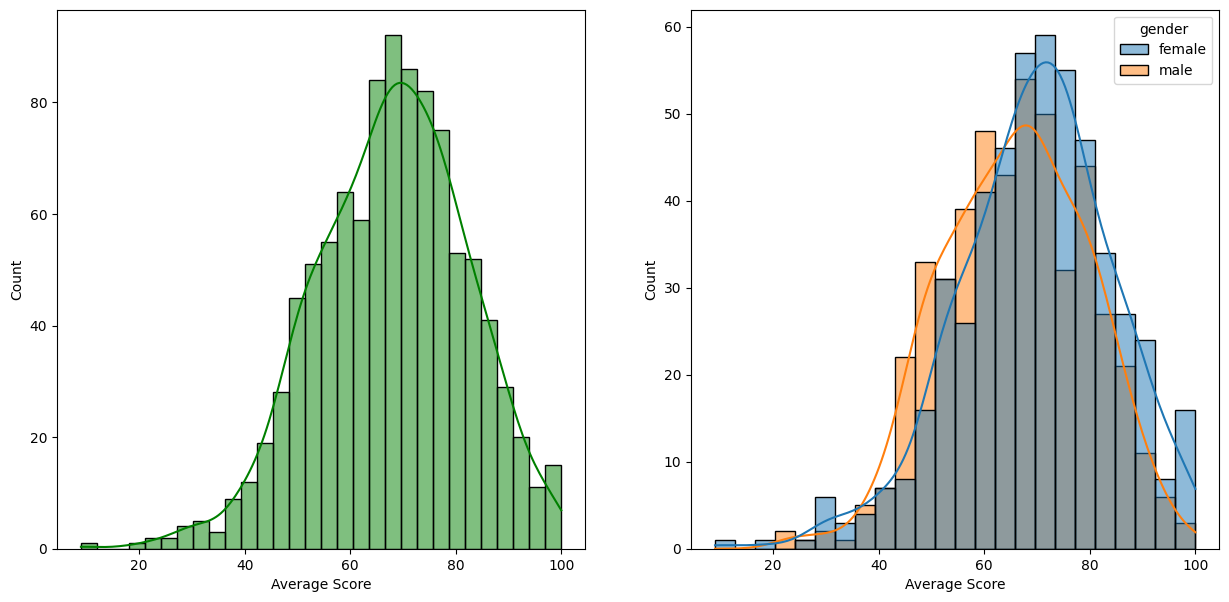

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average Score', bins=30, kde=True, color='green')
plt.subplot(122)
sns.histplot(data=df, x='Average Score', kde=True, hue='gender')
plt.show()

Insights:
- First, the majority of students have an average score that is between ~ 60 and 80.
- Second, we can see in the second graph that more females have gotten higher average scores than boys.

##### Visualize total score distribution w.r.t. gender

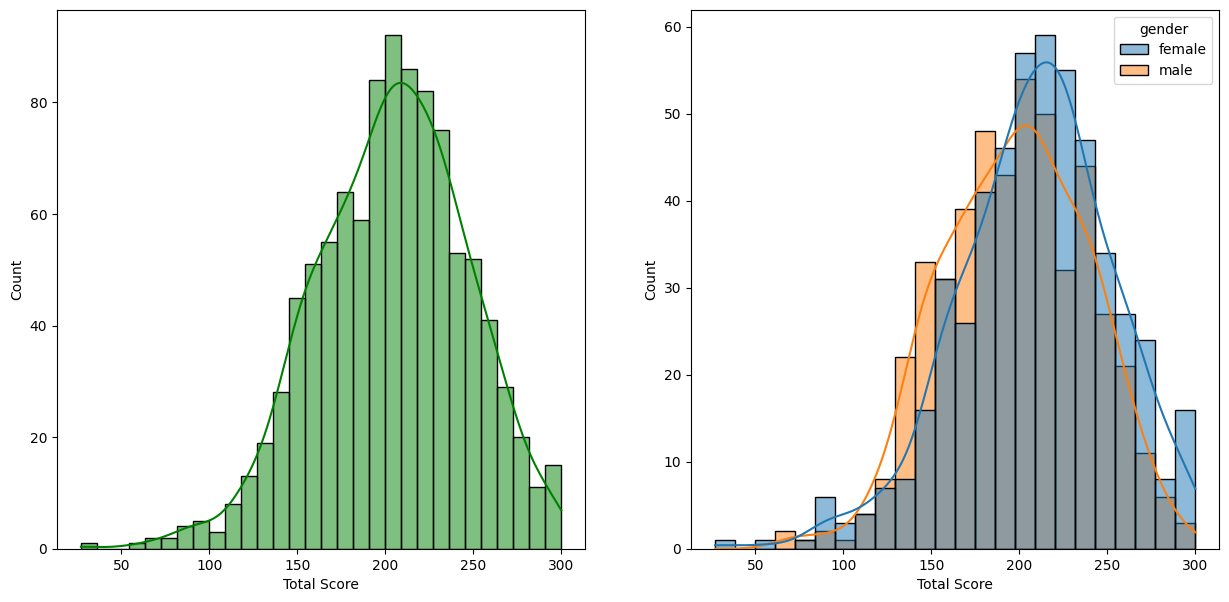

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, color='green')
plt.subplot(122)
sns.histplot(data=df, x='Total Score', kde=True, hue='gender')
plt.show()

Insights:
- The majority of students have a total score that is between ~ 180 and 240.
- We can see in the second graph that more females have gotten higher total scores than boys.
- Female students tend to perform better overall compared to male students in this case.

##### Visualize math score distribution w.r.t. gender

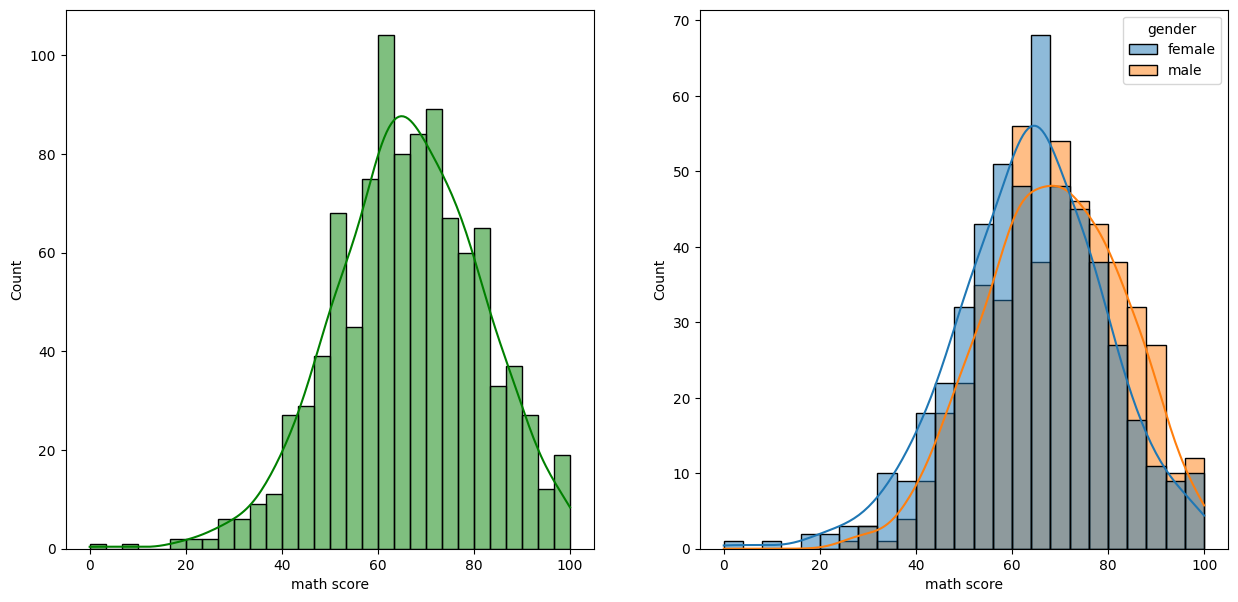

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='math score', bins=30, kde=True, color='green')
plt.subplot(122)
sns.histplot(data=df, x='math score', kde=True, hue='gender')
plt.show()

Insights:
- In terms of math score, males have performed better compared to females.